In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [213]:
df=pd.read_csv("/Users/aryangalande/Desktop/LP3 AG/ASGMT06-UberRidePrediction/uber.csv")

In [214]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [215]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [216]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [217]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [218]:
df.info

<bound method DataFrame.info of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [219]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [220]:
df.size

1800000

In [221]:
df.shape

(200000, 9)

In [222]:
df.ndim

2

In [223]:
df=df.drop(["Unnamed: 0","key","pickup_datetime"],axis=1)

In [224]:
df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [225]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [226]:
df=df.dropna()

In [227]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

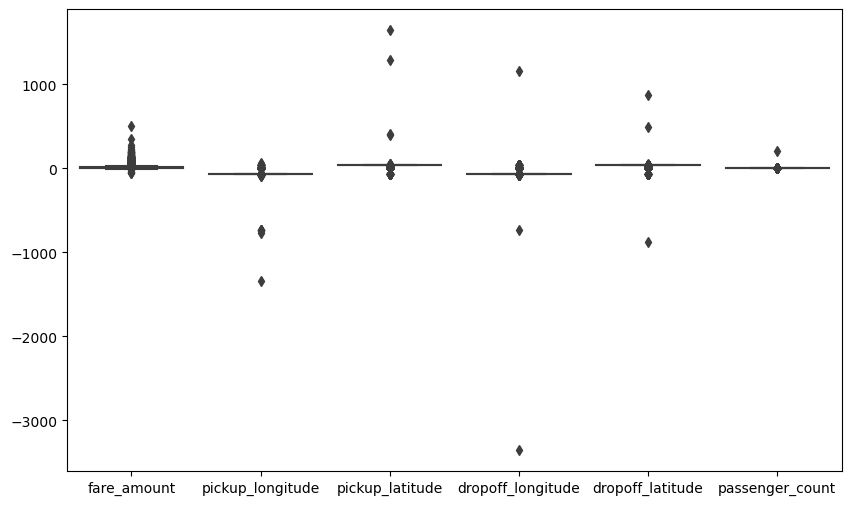

In [228]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [229]:
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    df=df[(df[col]>=lb) & (df[col]<=ub)]

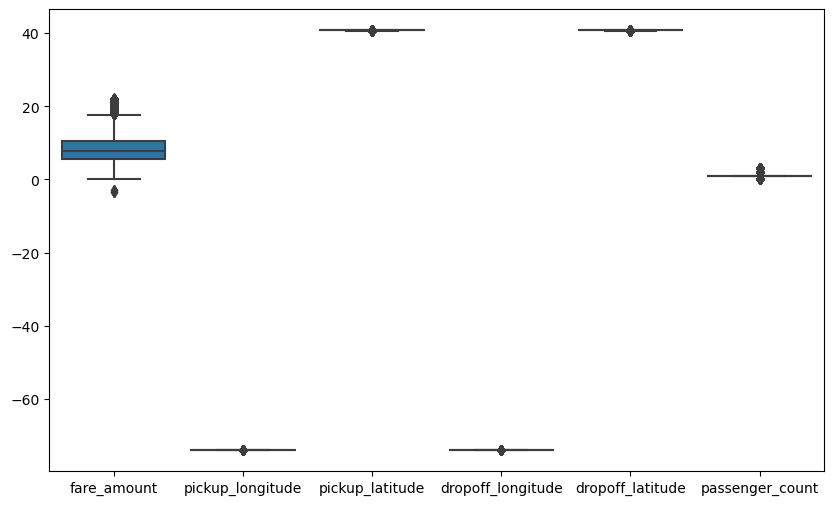

In [230]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

In [231]:
scaler=StandardScaler()
scaler_df=scaler.fit_transform(df)

In [232]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1
...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [233]:
scaler_df

array([[-0.2932847 , -1.1178711 , -0.67988539, -1.10660975, -1.33944605,
        -0.47502273],
       [-0.24166807, -0.77733472, -1.15915782, -0.81952246, -0.1218992 ,
        -0.47502273],
       [ 1.10036418, -1.44370658, -0.565552  ,  1.10237707,  0.88068643,
        -0.47502273],
       ...,
       [-0.2932847 , -0.17673965, -0.75165417, -1.53471183, -0.60271092,
        -0.47502273],
       [ 1.51329718, -0.94995784, -1.29035095, -0.13227415, -2.58814233,
        -0.47502273],
       [ 1.41006393, -0.15635196, -1.54470586, -0.2693492 ,  0.70758523,
        -0.47502273]])

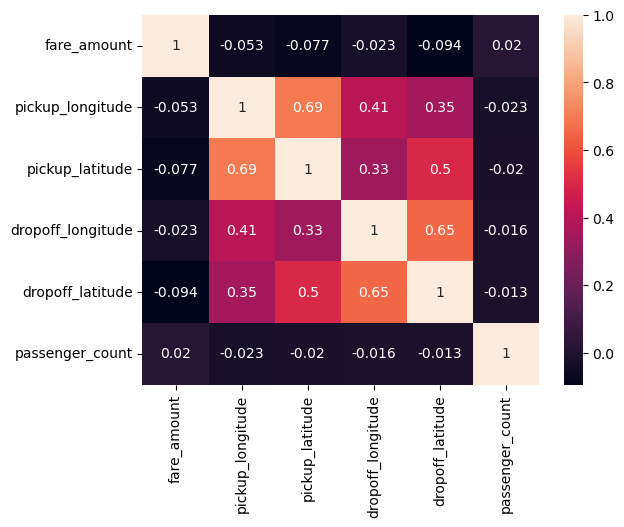

In [234]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [235]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [236]:
from sklearn.model_selection import train_test_split
x=df[['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y=df[['fare_amount']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [237]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [238]:
y_pred=model.predict(x_test)

In [239]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
135674,-73.962505,40.760505,-73.984278,40.728967,1
86925,-74.003610,40.732017,-74.006945,40.708003,1
163509,-73.989022,40.774377,-73.980119,40.753191,1
100776,-74.007676,40.731125,-73.994463,40.750677,1
115135,-73.975408,40.752942,-73.990746,40.750894,1
...,...,...,...,...,...
22093,-73.952522,40.768869,-73.963930,40.764103,1
61449,-73.948183,40.770322,-73.993247,40.752115,1
187861,-73.993345,40.753747,-74.002171,40.754956,1
168773,-73.969833,40.766758,-73.977540,40.765917,1


In [240]:
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
111622,-73.977124,40.749454,-73.958338,40.772473,1
89339,-73.982993,40.762627,-73.984092,40.759872,2
85903,-73.963801,40.765833,-74.007216,40.725144,1
101677,-73.987600,40.721499,-73.956326,40.747234,1
167444,-74.007198,40.734369,-73.976587,40.779081,1
...,...,...,...,...,...
2065,-73.994660,40.750527,-74.005027,40.751472,1
163916,-73.981811,40.768399,-73.973156,40.790159,1
83584,-73.947866,40.746785,-73.952718,40.747241,1
184044,-73.960410,40.772832,-73.970717,40.759043,1


In [241]:
y_train

,fare_amount
135674,8.9
86925,7.7
163509,8.9
100776,7.0
115135,7.5
...,...
22093,4.5
61449,13.5
187861,4.5
168773,4.1


In [242]:
y_test

,fare_amount
111622,7.4
89339,3.7
85903,18.0
101677,16.5
167444,17.5
...,...
2065,4.5
163916,6.5
83584,4.0
184044,4.9


In [243]:
y_pred

array([[8.56669089],
       [8.49618424],
       [8.6015961 ],
       ...,
       [9.03207648],
       [8.44957337],
       [9.43209684]])

In [244]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(r2)

14.697481680785337
3.8337294741263808
0.015018773321799572


In [245]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

/Users/aryangalande/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [246]:
y_pred=model1.predict(x_test)

In [247]:
y_pred

array([ 8.964 ,  5.76  , 18.477 , ...,  7.5156,  7.75  , 10.093 ])

In [248]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(r2)

4.462121895605799
2.112373521800962
0.7009619475105472
